In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import classification_report


In [2]:
train_df = pd.read_csv(r'C:\Users\Punde\Desktop\Data Science\Kaggle\Titanic/train.csv')
test_df = pd.read_csv(r'C:\Users\Punde\Desktop\Data Science\Kaggle\Titanic/test.csv')
combined = [train_df, test_df]

In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Feature Analysis

**Numerical Values**

<IPython.core.display.Javascript object>


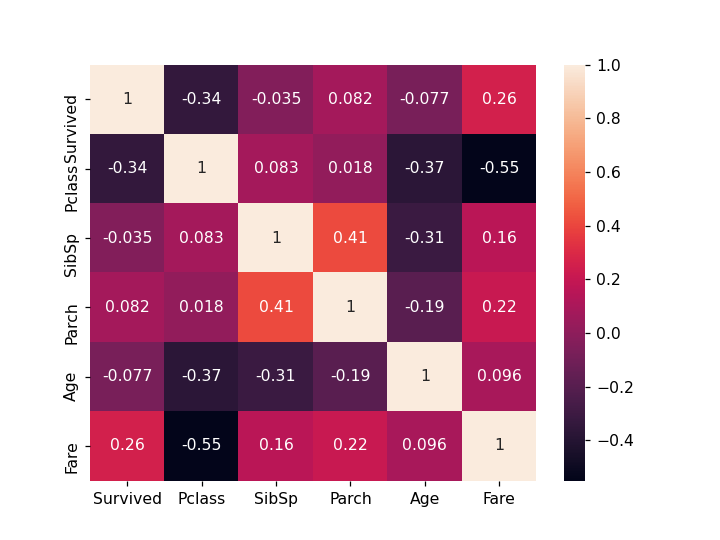

In [5]:
cm = sns.heatmap(train_df[["Survived","Pclass","SibSp","Parch","Age","Fare"]].corr(), annot = True, cmap = "rocket")

In [6]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [7]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [8]:
train_df[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [9]:
train_df[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


<IPython.core.display.Javascript object>


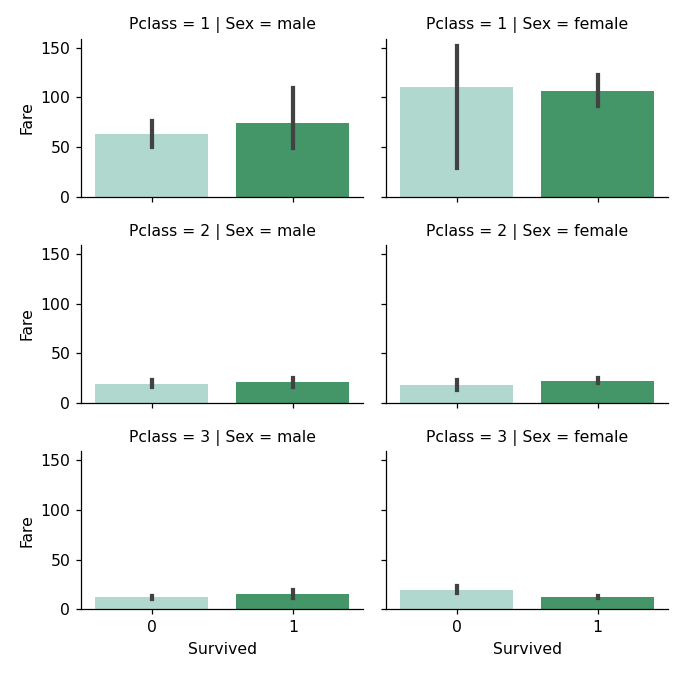

C:\Users\Punde\Anaconda3\envs\friday\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


In [10]:
g = sns.FacetGrid(train_df, row ='Pclass',col = 'Sex', height = 2, aspect = 1.5)
g.map(sns.barplot, 'Survived', 'Fare', palette = 'BuGn')
g.add_legend()

<IPython.core.display.Javascript object>


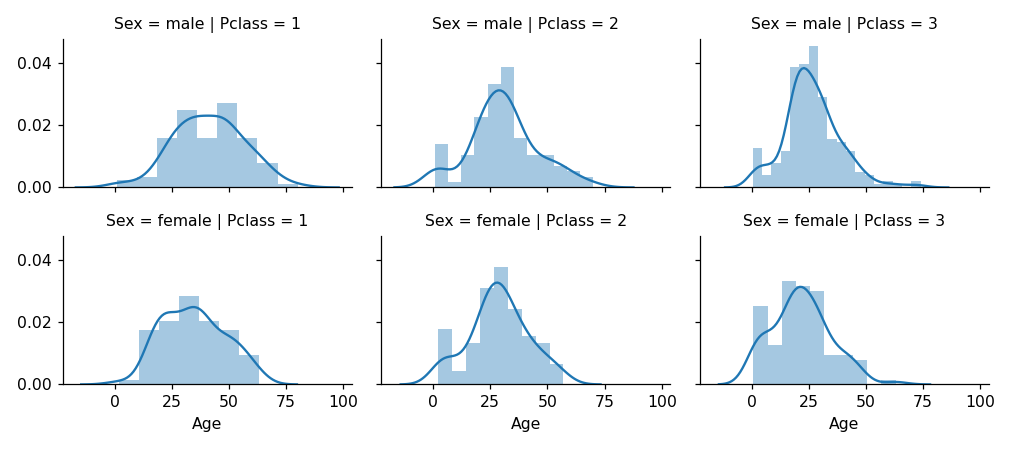

In [11]:
#Age

g = sns.FacetGrid(train_df, col='Pclass', row = 'Sex', height = 2, aspect = 1.5)
g.map(sns.distplot, 'Age')

<IPython.core.display.Javascript object>


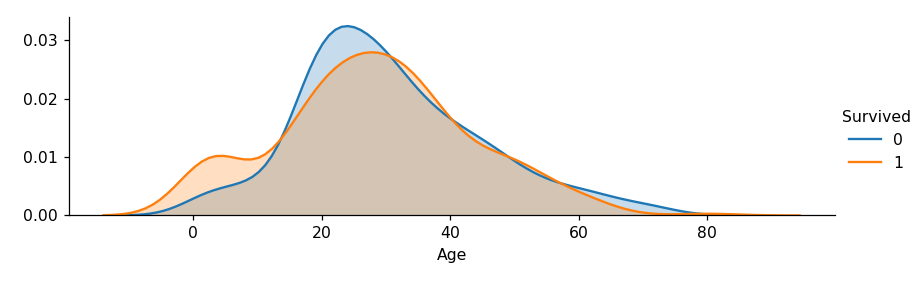

In [12]:
facet = sns.FacetGrid(train_df, hue = "Survived", height = 2.5, aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.add_legend()

In [13]:
#Fare

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

<IPython.core.display.Javascript object>


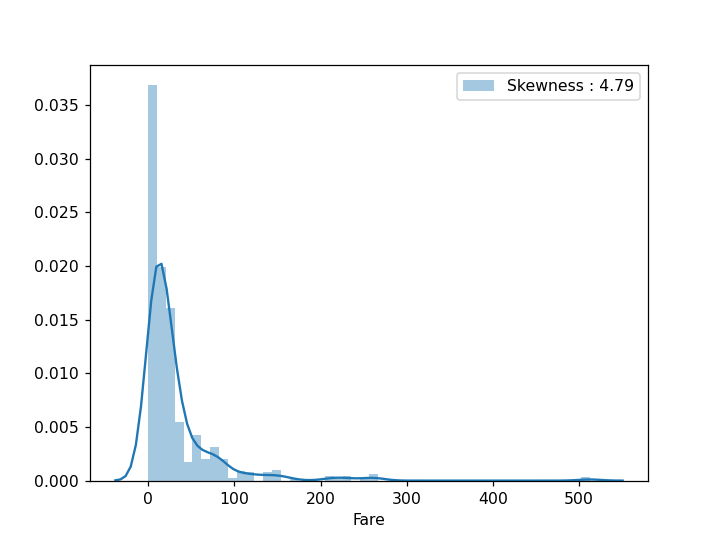

In [14]:
plt.figure()
g = sns.distplot(train_df["Fare"], label="Skewness : %.2f"%(train_df["Fare"].skew()) )
g.legend()

As we can see, Fare distribution is very skewed. This can lead to overweigth very high values in the model, even if it is scaled.

In this case, it is better to transform it with the log function to reduce this skew.

<IPython.core.display.Javascript object>


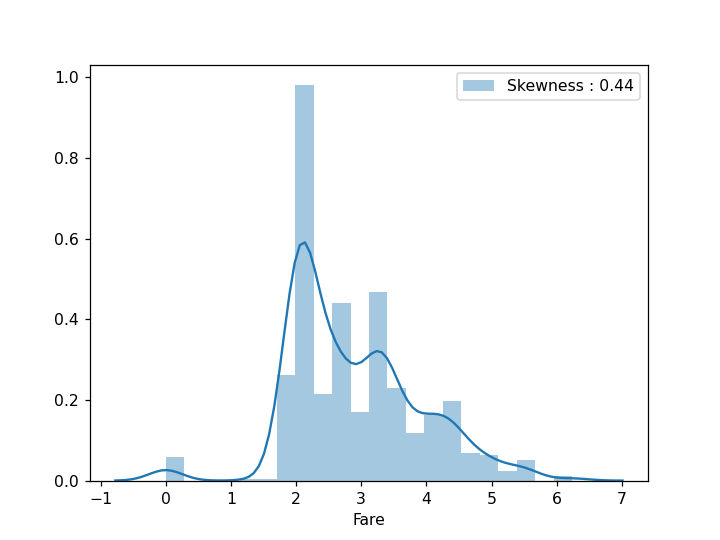

In [15]:
for df in combined:
    df["Fare"] = df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure()
g = sns.distplot(train_df["Fare"], label="Skewness : %.2f"%(train_df["Fare"].skew()) )
g.legend()

**Categorical Values**

<IPython.core.display.Javascript object>


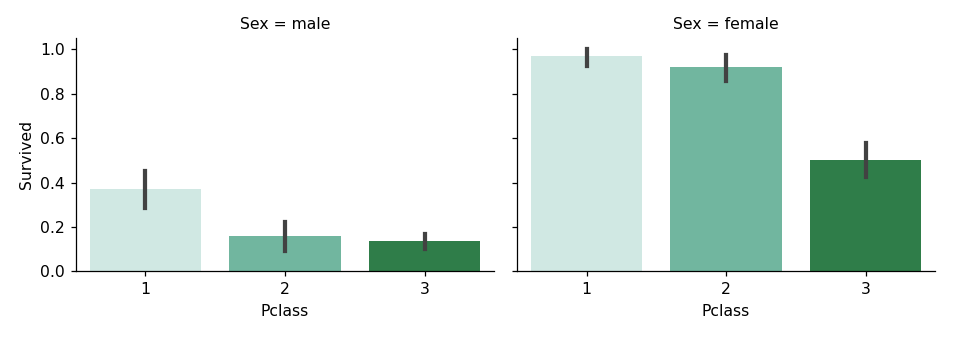

C:\Users\Punde\Anaconda3\envs\friday\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


In [16]:
#Pclass

grid = sns.FacetGrid(train_df, col = 'Sex', height = 3, aspect=1.4)
grid.map(sns.barplot, 'Pclass','Survived', palette = 'BuGn')
grid.add_legend()

<IPython.core.display.Javascript object>


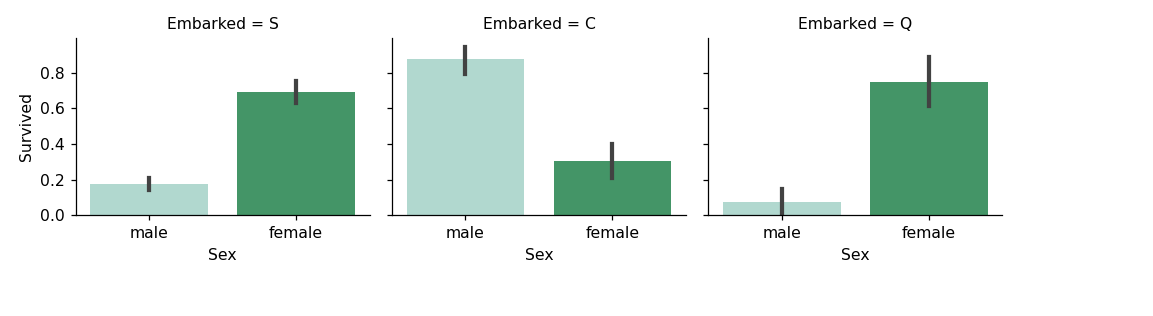

In [17]:
#Embarked

frq_em = train_df['Embarked'].dropna().mode()[0]
for df in combined:
    df['Embarked'] = df['Embarked'].fillna(frq_em)
    
grid = sns.FacetGrid(train_df, col = 'Embarked', height = 2.5, aspect=1.2)
grid.map(sns.barplot, 'Sex', 'Survived', palette = 'BuGn')
grid.add_legend()

<IPython.core.display.Javascript object>


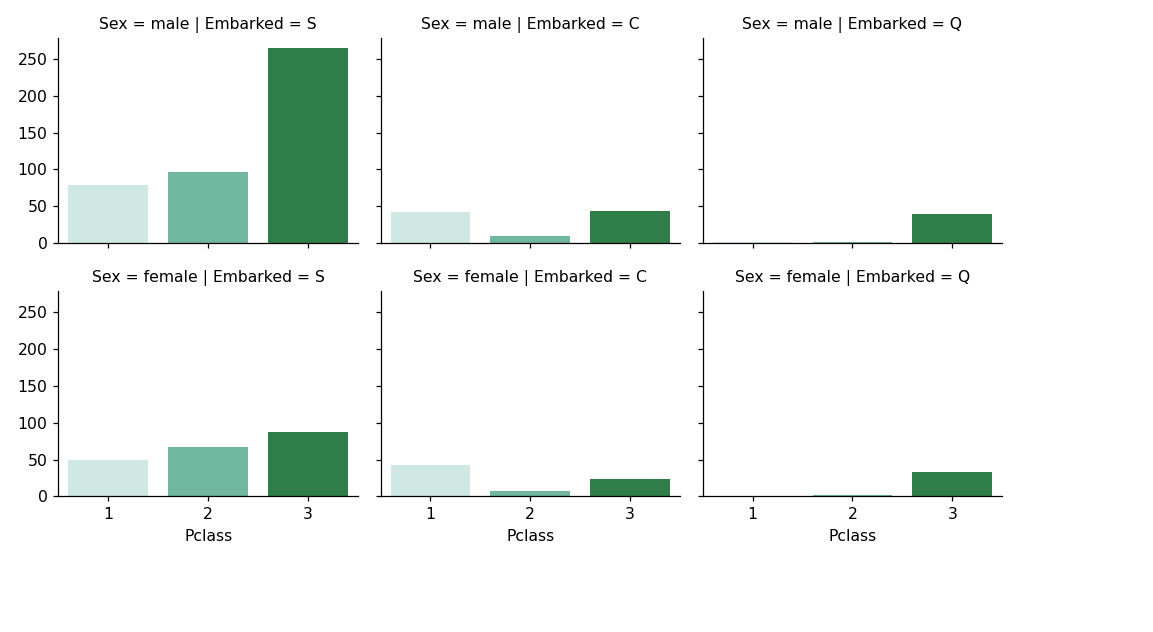

C:\Users\Punde\Anaconda3\envs\friday\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


In [18]:
grid = sns.FacetGrid(train_df, col = 'Embarked', row = 'Sex', height = 2.5, aspect=1.2)
grid.map(sns.countplot, 'Pclass', palette = 'BuGn')
grid.add_legend()

## Filling Missing Values

<IPython.core.display.Javascript object>


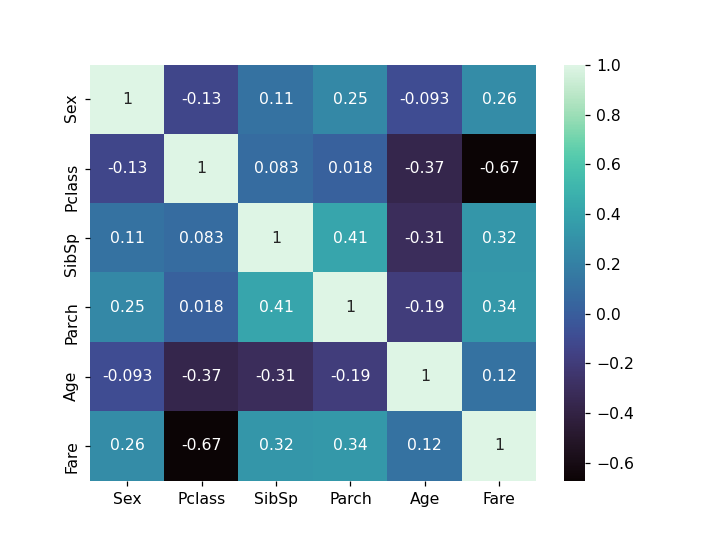

In [19]:
for df in combined:
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
plt.figure()
sns.heatmap(train_df[["Sex","Pclass","SibSp","Parch","Age","Fare"]].corr(), annot = True, cmap = "mako")

Age is not correlated with Sex, but is negatively correlated with Pclass, Parch and SibSp. But the general correlation is negative.

<IPython.core.display.Javascript object>


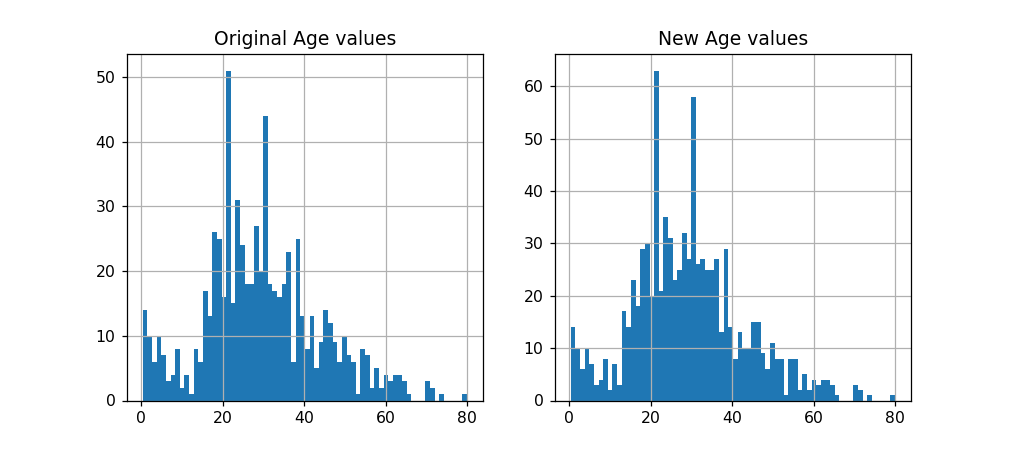

C:\Users\Punde\Anaconda3\envs\friday\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
#Age 

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,4))
ax1.set_title('Original Age values')
ax2.set_title('New Age values')
train_df['Age'].dropna().hist(bins = 70, ax = ax1)


for df in combined:
    for x in range(0,2):
        for p in range(0,3):
            age_grp = df[(df['Sex'] == x) & (df['Pclass'] == p+1)]['Age']
            
            grp_mean = age_grp.mean()
            grp_std  = age_grp.std()
            grp_count = age_grp.isnull().sum()
            
            age_guess = np.random.randint(grp_mean - grp_std, grp_mean + grp_std, size = grp_count) 
            df["Age"][np.isnan(df["Age"]) & (df['Sex'] == x) & (df['Pclass'] == p+1)] = age_guess

train_df['Age'].hist(bins = 70, ax = ax2)

C:\Users\Punde\Anaconda3\envs\friday\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


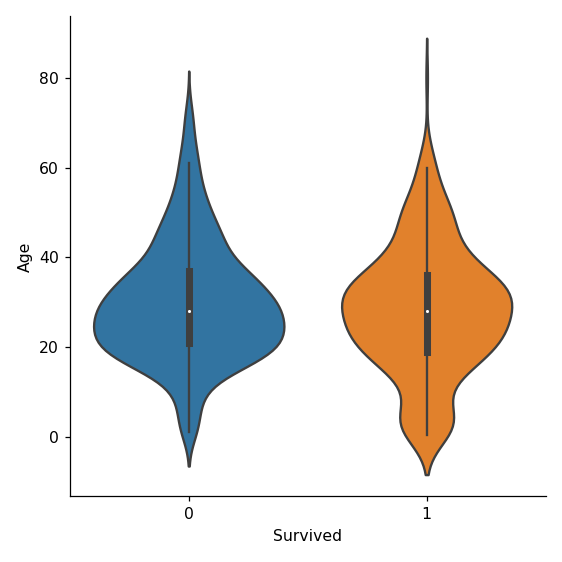

In [21]:
g = sns.factorplot(x="Survived", y = "Age", data = train_df, kind = "violin")

In the violin plot of survived passengers, we still notice that very young passengers have higher survival rate.

In [22]:
train_df = train_df.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combined = [train_df, test_df]

## Feature Engineering

**Name**

In [23]:
for df in combined:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


C:\Users\Punde\Anaconda3\envs\friday\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


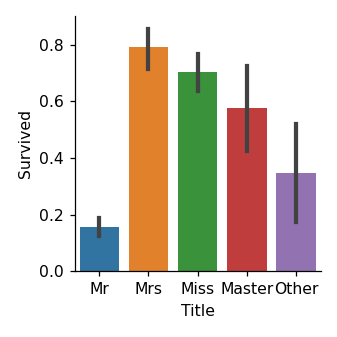

In [24]:
for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                                 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
g = sns.factorplot(x="Title",y="Survived",data=train_df,kind="bar", height = 3)

In [25]:
train_df, test_df = [pd.get_dummies(df, columns = ['Title', 'Pclass', 'Embarked']) for df in combined]

In [26]:
train_df.drop(['Name', 'Title_Other', 'Pclass_3', 'Embarked_Q'], axis = 1, inplace = True)
test_df.drop(['Name', 'Title_Other', 'Pclass_3', 'Embarked_Q'], axis = 1, inplace = True)

combined = [train_df, test_df]

**Family Size**

<IPython.core.display.Javascript object>


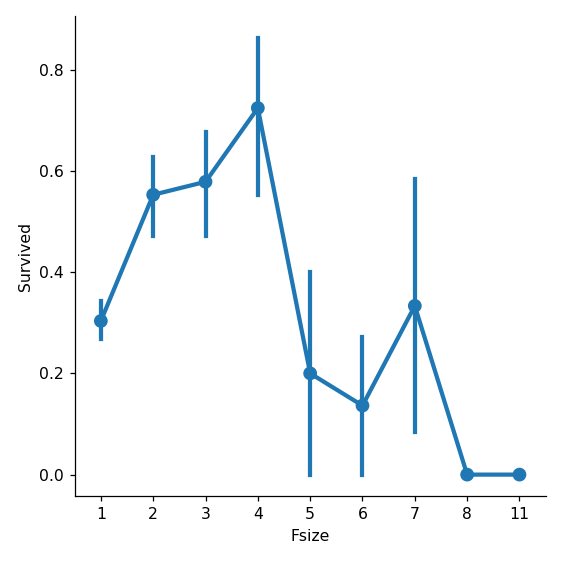

In [27]:
for df in combined:
    df['Fsize'] = df['SibSp'] + df['Parch'] + 1
    df['Alone'] = df['Fsize'].map(lambda x: 1 if x == 1 else 0)
    df['sFam'] = df['Fsize'].map(lambda x: 1 if  x == 2 else 0)
    df['mFam'] = df['Fsize'].map(lambda x: 1 if 2 < x <= 4 else 0)
    df['lFam'] = df['Fsize'].map(lambda x: 1 if 4 < x else 0)
    
g = sns.factorplot(x="Fsize",y="Survived",data = train_df)

In [28]:
for df in combined:
    df.drop(['Fsize', 'SibSp', 'Parch', 'lFam'], axis = 1, inplace = True)
    
train_df.head()

,Survived,Sex,Age,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Pclass_1,Pclass_2,Embarked_C,Embarked_S,Alone,sFam,mFam
0,0,0,22.0,1.981001,0,0,1,0,0,0,0,1,0,1,0
1,1,1,38.0,4.266662,0,0,0,1,1,0,1,0,0,1,0
2,1,1,26.0,2.070022,0,1,0,0,0,0,0,1,1,0,0
3,1,1,35.0,3.972177,0,0,0,1,1,0,0,1,0,1,0
4,0,0,35.0,2.085672,0,0,1,0,0,0,0,1,1,0,0


## Modelling

In [29]:
test_y = pd.read_csv(r'C:\Users\Punde\Desktop\Data Science\Kaggle\Titanic\submission.csv')
test_X = test_df.drop('PassengerId', axis = 1).copy()

X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Survived', axis=1), train_df['Survived'], train_size = 0.8)
X_train.shape, X_test.shape

((712, 14), (179, 14))

**Model Prediction**

- LogisticRegression
- SVC
- LinearSVC
- GaussianNB
- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- MLPClassifier

**1. Simple Model**

In [30]:
#Logistic Regression

clf = LogisticRegression(max_iter = 10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8603351955307262

In [31]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc.score(X_test, y_test)

0.6983240223463687

In [32]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
linear_svc.score(X_test, y_test)

C:\Users\Punde\Anaconda3\envs\friday\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8268156424581006

In [33]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)


0.8100558659217877

In [34]:
# Gradient Boosting Classifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
gbc.score(X_test, y_test)

0.8324022346368715

In [35]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC(gamma = 0.1))
clfs.append(LinearSVC())
clfs.append(GaussianNB())
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())
clfs.append(MLPClassifier())

cv_score = []
for clf in clfs:
    cv_score.append(cross_val_score(clf, X_train, y_train, cv = 8, n_jobs = 4))

result = []
std = []
for score in cv_score:
    result.append(score.mean())
    std.append(score.std())

<IPython.core.display.Javascript object>


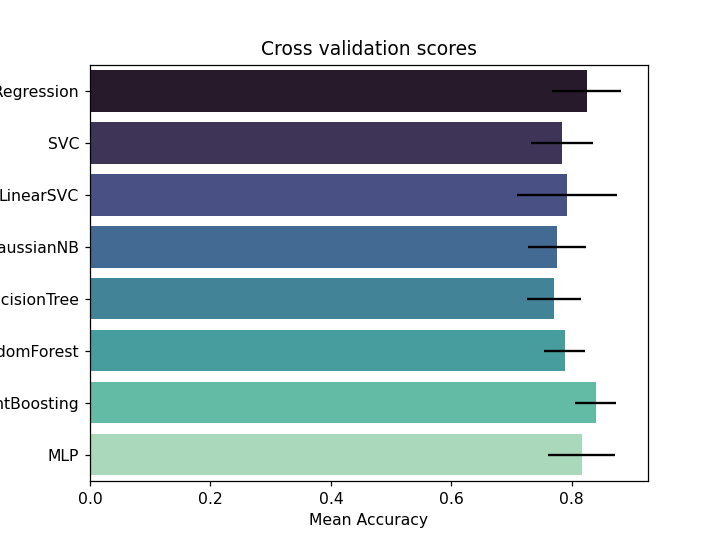

In [36]:
plt.figure()
algos = ['LogisticRegression', 'SVC','LinearSVC','GaussianNB','DecisionTree','RandomForest','GradientBoosting','MLP']
g = sns.barplot(result, algos, **{'xerr':std}, palette = 'mako', orient = 'h')
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

**Hyperparameter Tuning**

Grid search optimization for SVC, RandomForest, GradientBoosting and MLP classifiers

In [40]:
#SVC

SVMC = SVC(probability=True)
grid = {'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1], 'C': [0.1, 1, 10, 50]}

gsSVMC = GridSearchCV(SVMC, param_grid = grid, cv = 3, n_jobs = 4, verbose = 2)

gsSVMC.fit(X_train,y_train)
best = gsSVMC.best_estimator_

# Best score
print(gsSVMC.best_score_, gsSVMC.best_params_, best)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:    2.1s finished


0.8061258258577692 {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'} SVC(C=50, gamma=0.01, probability=True)


In [41]:
#Random Forest 

RFC = RandomForestClassifier()
grid = {"max_features": [1, 3, 10], "min_samples_leaf": [1, 3, 10], "n_estimators" :[50, 100, 200]}

gsRFC = GridSearchCV(RFC, param_grid = grid, cv=3, n_jobs = 4,verbose = 1)

gsRFC.fit(X_train,y_train)
best = gsRFC.best_estimator_

# Best score
print(gsRFC.best_score_, gsRFC.best_params_, best)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed:   18.7s finished


0.8328369322412509 {'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 200} RandomForestClassifier(max_features=3, min_samples_leaf=3, n_estimators=200)


In [42]:
#Gradient Boosting

GBC = GradientBoostingClassifier()
grid = {'n_estimators' : [100,200,300], 'learning_rate': [1, 0.1, 0.05, 0.01], 'max_depth': [4, 8]}

gsGBC = GridSearchCV(GBC, param_grid = grid, cv=3, n_jobs = 4,verbose = 1)

gsGBC.fit(X_train,y_train)
best = gsGBC.best_estimator_

# Best score
print(gsGBC.best_score_, gsGBC.best_params_, best)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:   30.1s finished


0.8244040232126606 {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200} GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=200)
